# Training a model with a curated image dataset in fastai
Walkthrough of how to train a deep learning model in fastai with a curated image dataset


In [1]:
# imports for notebook boilerplate
!pip install -Uqq fastbook
import fastbook
from fastbook import *
from fastai.vision.all import *

In [2]:
# set up the notebook for fast.ai
fastbook.setup_book()

# Ingest the dataset
- create a path object
- defined an ImageDataLoaders object

In [3]:
# ingest the curated image dataset CIFAR
path = untar_data(URLs.CIFAR)

In [4]:
# examine the directory structure of the dataset
path.ls()

(#3) [Path('/root/.fastai/data/cifar10/train'),Path('/root/.fastai/data/cifar10/test'),Path('/root/.fastai/data/cifar10/labels.txt')]

In [5]:
dls = ImageDataLoaders.from_folder(path, train='train', valid='test')

# Examine the dataset

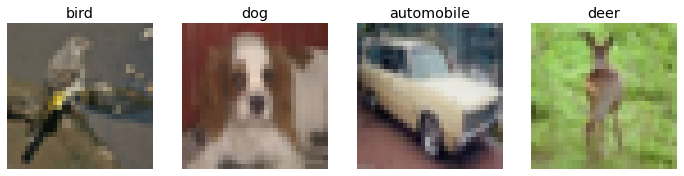

In [6]:
# show a batch of training data
dls.train.show_batch(max_n=4, nrows=1)


In [7]:
# examine the train subdirectory
(path/'train').ls()

(#10) [Path('/root/.fastai/data/cifar10/train/truck'),Path('/root/.fastai/data/cifar10/train/cat'),Path('/root/.fastai/data/cifar10/train/deer'),Path('/root/.fastai/data/cifar10/train/bird'),Path('/root/.fastai/data/cifar10/train/airplane'),Path('/root/.fastai/data/cifar10/train/frog'),Path('/root/.fastai/data/cifar10/train/ship'),Path('/root/.fastai/data/cifar10/train/dog'),Path('/root/.fastai/data/cifar10/train/automobile'),Path('/root/.fastai/data/cifar10/train/horse')]

In [8]:
(path/'train/dog').ls()

(#5000) [Path('/root/.fastai/data/cifar10/train/dog/17721_dog.png'),Path('/root/.fastai/data/cifar10/train/dog/27828_dog.png'),Path('/root/.fastai/data/cifar10/train/dog/29020_dog.png'),Path('/root/.fastai/data/cifar10/train/dog/29577_dog.png'),Path('/root/.fastai/data/cifar10/train/dog/8497_dog.png'),Path('/root/.fastai/data/cifar10/train/dog/24363_dog.png'),Path('/root/.fastai/data/cifar10/train/dog/10082_dog.png'),Path('/root/.fastai/data/cifar10/train/dog/18634_dog.png'),Path('/root/.fastai/data/cifar10/train/dog/18568_dog.png'),Path('/root/.fastai/data/cifar10/train/dog/1072_dog.png')...]

In [9]:
(path/'train/cat').ls()

(#5000) [Path('/root/.fastai/data/cifar10/train/cat/23590_cat.png'),Path('/root/.fastai/data/cifar10/train/cat/47146_cat.png'),Path('/root/.fastai/data/cifar10/train/cat/47075_cat.png'),Path('/root/.fastai/data/cifar10/train/cat/42825_cat.png'),Path('/root/.fastai/data/cifar10/train/cat/41694_cat.png'),Path('/root/.fastai/data/cifar10/train/cat/11257_cat.png'),Path('/root/.fastai/data/cifar10/train/cat/43626_cat.png'),Path('/root/.fastai/data/cifar10/train/cat/12823_cat.png'),Path('/root/.fastai/data/cifar10/train/cat/18414_cat.png'),Path('/root/.fastai/data/cifar10/train/cat/6030_cat.png')...]

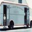

In [10]:
# take a look at one of the images
img_files = get_image_files(path)
img = PILImage.create(img_files[100])
img

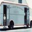

In [11]:
# display a thumbnail of the image
img.to_thumb(180)

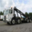

In [12]:
img = PILImage.create(img_files[3000])
img

# Define and train the model

In [13]:
#learn = cnn_learner(dls, resnet18, pretrained=False,
#                    loss_func=LabelSmoothingCrossEntropy(), metrics=accuracy)
learn = cnn_learner(dls, resnet18, 
                    loss_func=LabelSmoothingCrossEntropy(), 
                    metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


In [14]:
%%time
learn.fine_tune(5)

epoch,train_loss,valid_loss,accuracy,time
0,1.841992,1.701241,0.461800,00:45


epoch,train_loss,valid_loss,accuracy,time
0,1.322602,1.226550,0.682400,00:56
1,1.087883,1.052689,0.760300,00:56
2,0.978507,0.992552,0.785200,00:56
3,0.817433,0.986781,0.793000,00:56
4,0.748526,0.996486,0.792200,00:57


CPU times: user 5min 17s, sys: 5.46 s, total: 5min 23s
Wall time: 5min 29s


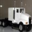

In [15]:
# take a look at one of the test images
img_test_files = get_image_files(path/"test")
img2 = PILImage.create(img_test_files[700])
img2

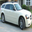

In [16]:
# select an image from the test set
img3 = PILImage.create(img_test_files[8000])
img3

In [17]:
# apply the trained model to the image
learn.predict(img2)

('truck',
 tensor(9),
 tensor([0.0098, 0.0033, 0.0070, 0.0117, 0.0079, 0.0099, 0.0083, 0.0073, 0.0063, 0.9286]))

In [18]:
# apply the trained model to the image
learn.predict(img3)

('automobile',
 tensor(1),
 tensor([0.0054, 0.9139, 0.0124, 0.0117, 0.0089, 0.0105, 0.0090, 0.0123, 0.0088, 0.0071]))

In [19]:
learn.path = Path('/notebooks/temp')
learn.export('cifar_apr20_2021.pkl')

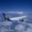

In [20]:
# select an image from the test set
img4 = PILImage.create(img_test_files[4000])
img4

In [21]:
learn.predict(img4)

('airplane',
 tensor(0),
 tensor([0.8826, 0.0127, 0.0315, 0.0073, 0.0088, 0.0160, 0.0115, 0.0088, 0.0118, 0.0091]))

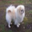

In [22]:
# take a look at a dog image from the training dataset
dog_files = get_image_files(path/"train/dog")
dog_img = PILImage.create(dog_files[30])
dog_img

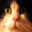

In [23]:
# take a look at a cat image from the training dataset
cat_files = get_image_files(path/"train/cat")
cat_img = PILImage.create(cat_files[30])
cat_img

In [24]:
learn.summary()

Sequential (Input shape: 64)
Layer (type)         Output Shape         Param #    Trainable 
                     64 x 64 x 16 x 16   
Conv2d                                    9408       True      
BatchNorm2d                               128        True      
ReLU                                                           
MaxPool2d                                                      
Conv2d                                    36864      True      
BatchNorm2d                               128        True      
ReLU                                                           
Conv2d                                    36864      True      
BatchNorm2d                               128        True      
Conv2d                                    36864      True      
BatchNorm2d                               128        True      
ReLU                                                           
Conv2d                                    36864      True      
BatchNorm2d                      

In [25]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  